/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC2.txt
[101]
[0.59740678 0.71171002] [1.03041491 0.08032942]
[0.78484621 0.70963253] [ 1.1990613  -0.03610321]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
101
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.20493453633936584
0.1
Final distance 0.0028475650240968606
Final relative distance 0.013894998251448321
Min relative distance 0.013894998251448321
Min simulation: 46
Final simulation: 46


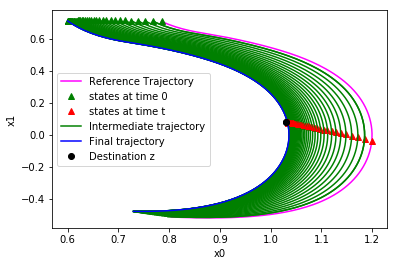

Time taken: 19.91821050643921
idx **** 1
[181]
[0.85145409 0.90749039] [ 1.05598243 -0.54520888]
[0.63350337 0.76257935] [ 0.86125779 -0.48025467]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
181
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.20527234460763444
0.1
Final distance 0.002973909283358802
Final relative distance 0.014487627590766054
Min relative distance 0.014487627590766054
Min simulation: 40
Final simulation: 40


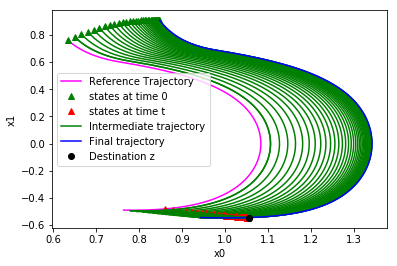

Time taken: 17.074495315551758
idx **** 2
[187]
[0.79712056 1.03910797] [ 1.0185208 -0.5406884]
[0.85706285 0.58169505] [ 0.72057621 -0.49051781]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
187
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.3021391477306241
0.1
Final distance 0.0065574768963338
Final relative distance 0.021703499680816602
Min relative distance 0.021703499680816602
Min simulation: 51
Final simulation: 51


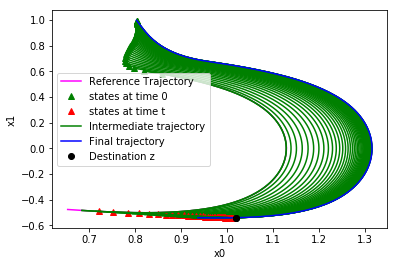

Time taken: 22.429838180541992
idx **** 3
[192]
[0.6835742  0.55632997] [ 0.64465355 -0.45927538]
[1.17860713 0.89770518] [ 1.30592193 -0.60785272]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
192
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.6777544481592407
0.1
Final distance 0.002830572387185823
Final relative distance 0.004176398096498763
Min relative distance 0.004176398096498763
Min simulation: 49
Final simulation: 49


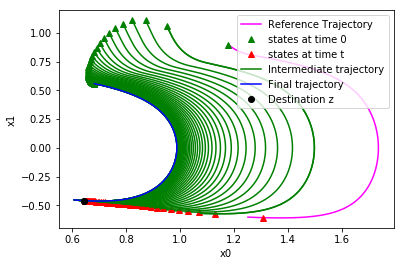

Time taken: 19.22027587890625
idx **** 4
[59]
[1.13363672 0.55618476] [ 1.31612446 -0.02243807]
[0.72924907 0.53681345] [0.96711454 0.21642747]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
59
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.422923955619158
0.1
Final distance 0.0027324988802835152
Final relative distance 0.006460969741671771
Min relative distance 0.006460969741671771
Min simulation: 46
Final simulation: 46


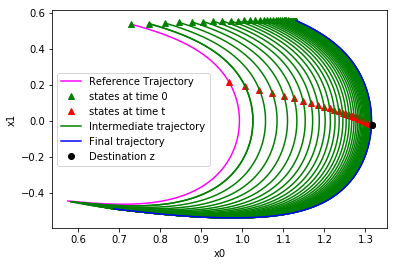

Time taken: 17.87335968017578
idx **** 5
46.4
0.00358840449425176
0.012144698672240302
51


In [1]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC2')
evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(201)

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 5
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    time_steps = random.sample(range(30, 200), 1)
    print(time_steps)
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.003, 
                        correction_steps = [1], scaling_factors=[0.1], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulationsCount()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC2.txt
[93]
[1.04096367 0.53702426] [ 1.16129602 -0.35478873]
[1.01485938 1.10546662] [1.57872706 0.17312849]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
93
***** path idx 0 s_factor 0.2 correction steps 1
Starting distance: 0.6730120806926769
0.2
Final distance 0.002743852116631191
Final relative distance 0.004076973051965376
Min relative distance 0.004076973051965376
Min simulation: 27
Final simulation: 27


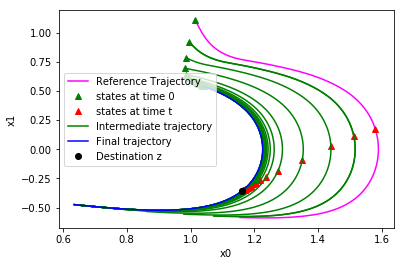

Time taken: 10.281535625457764
idx **** 1
[51]
[0.93878476 0.54144959] [1.13453814 0.17141537]
[0.58046985 0.88060913] [0.88986053 0.49072821]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
51
***** path idx 0 s_factor 0.2 correction steps 1
Starting distance: 0.4022782875671387
0.2
Final distance 0.0026750191432964193
Final relative distance 0.00664967318886175
Min relative distance 0.00664967318886175
Min simulation: 21
Final simulation: 21


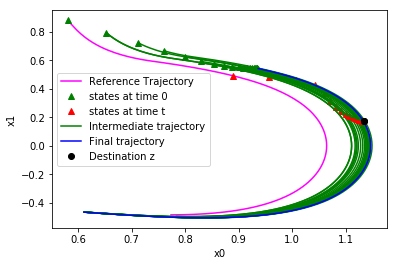

Time taken: 8.269236326217651
idx **** 2
[110]
[0.83877861 0.94356848] [ 1.33913404 -0.08391087]
[0.87455352 0.64391076] [ 1.18123242 -0.26817131]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
110
***** path idx 0 s_factor 0.2 correction steps 1
Starting distance: 0.24266197380875262
0.2
Final distance 0.00410243280301974
Final relative distance 0.016905956622000277
Min relative distance 0.016905956622000277
Min simulation: 31
Final simulation: 31


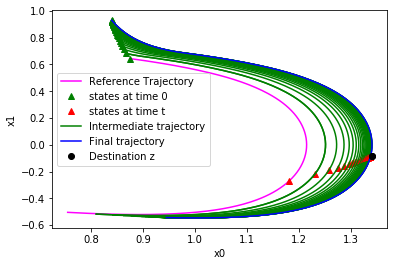

Time taken: 11.393492698669434
idx **** 3
[80]
[1.12866614 0.93758836] [1.65389757 0.33059434]
[0.92009365 1.17366427] [1.4398763  0.34911149]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
80
***** path idx 0 s_factor 0.2 correction steps 1
Starting distance: 0.2148208295570088
0.2
Final distance 0.004062803792551362
Final relative distance 0.018912522593500094
Min relative distance 0.018912522593500094
Min simulation: 31
Final simulation: 31


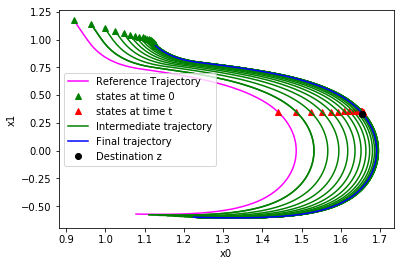

Time taken: 12.923269987106323
idx **** 4
[140]
[1.06465317 0.62557159] [ 1.08864723 -0.53311837]
[0.62730301 1.15252468] [ 1.12689507 -0.28187502]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC2_RBF_1_512_ReLU.h5
140
***** path idx 0 s_factor 0.2 correction steps 1
Starting distance: 0.2541379829975467
0.2
Final distance 0.0024906769764809896
Final relative distance 0.009800490847938433
Min relative distance 0.009800490847938433
Min simulation: 31
Final simulation: 31


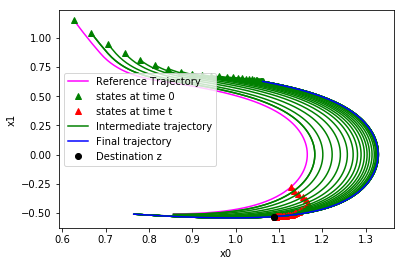

Time taken: 12.594990491867065
idx **** 5
28.2
0.0032149569663959404
0.011269123260853187
31


In [7]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC2')
evalObject.setSimsBound(30)
dataObject = evalObject.setDataObject()
dataObject.setSteps(201)

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 5
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    time_steps = random.sample(range(30, 200), 1)
    print(time_steps)
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.003, 
                        correction_steps = [1], scaling_factors=[0.2], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulationsCount()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9Tanh.txt
[127]
[-0.52391792 -0.34883558  0.53600305 -0.12441642] [-0.45633039  0.43676616  0.3431584  -0.1742763 ]
[-0.98516949 -0.3261567   0.35886336 -0.09845539] [-0.58219835  0.86952988  0.19041282 -0.15748437]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
127
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.4761726186631527
0.1
Final distance 0.004030861179803052
Final relative distance 0.008465125926643226
Min relative distance 0.008465125926643226
Min simulation: 51
Final simulation: 51


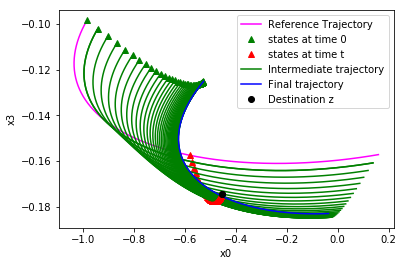

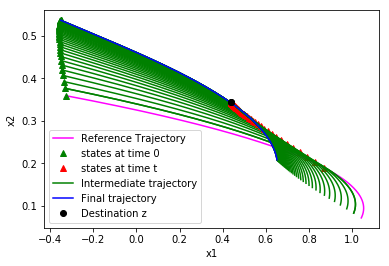

Time taken: 5.188309669494629
idx **** 1
[53]
[-0.96782173 -0.33539112  0.48622525 -0.26607821] [-0.99878581  0.22008737  0.33783621 -0.29275638]
[-0.97182307 -0.50929808  0.20227768 -0.40646408] [-1.09420153  0.05640719 -0.0181974  -0.42456543]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
53
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.4242981408142171
0.1
Final distance 0.0028669688409950723
Final relative distance 0.006756967719663899
Min relative distance 0.006756967719663899
Min simulation: 51
Final simulation: 51


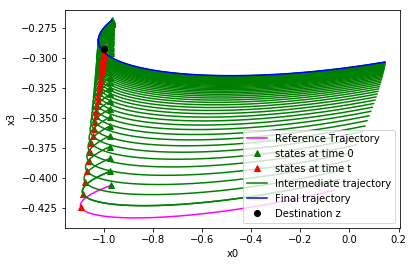

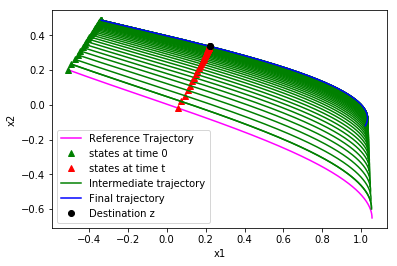

Time taken: 5.2901060581207275
idx **** 2
[158]
[-0.71496821 -0.48192038  0.24428064 -0.43933818] [-0.47659023  0.69881171 -0.46873157 -0.44916052]
[-0.87454186 -0.16909026  0.69291864 -0.21422614] [-0.10785776  0.91923475  0.29987385 -0.26539394]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
158
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.8994856311967743
0.1
Final distance 0.0027813425753874087
Final relative distance 0.0030921478664276223
Min relative distance 0.0030921478664276223
Min simulation: 51
Final simulation: 51


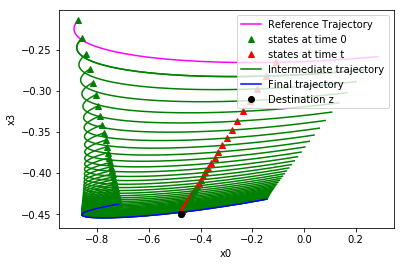

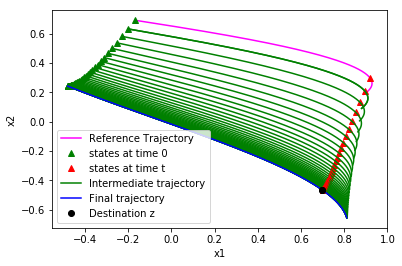

Time taken: 5.449681282043457
idx **** 3
[171]
[-0.90280313 -0.52902463  0.58967453 -0.39381262] [-0.36240575  0.97798218 -0.13534014 -0.43288789]
[-0.54404421 -0.20849669  0.55485403 -0.30242785] [-0.09165882  0.58612644  0.00528644 -0.32509759]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
171
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.5081824494724569
0.1
Final distance 0.005355658491637462
Final relative distance 0.01053884977176437
Min relative distance 0.01053884977176437
Min simulation: 51
Final simulation: 51


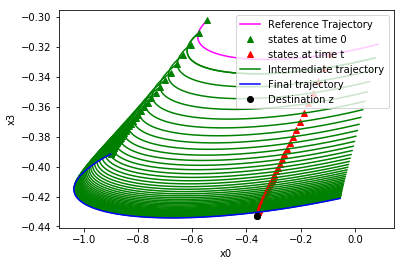

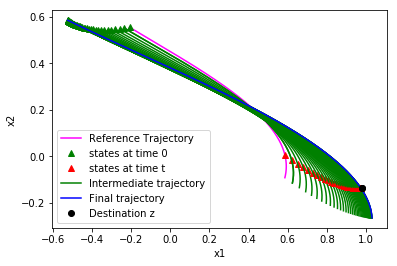

Time taken: 5.312092065811157
idx **** 4
[114]
[-0.91234714 -0.43527753  0.64688022 -0.2857948 ] [-0.74730938  0.6865509   0.28800933 -0.33651462]
[-0.64600699 -0.52752316  0.58140686 -0.24589482] [-0.72235835  0.40294129  0.27184542 -0.29286087]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
114
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.28848550654047145
0.1
Final distance 0.0028771066799531428
Final relative distance 0.009973141162117673
Min relative distance 0.009973141162117673
Min simulation: 48
Final simulation: 48


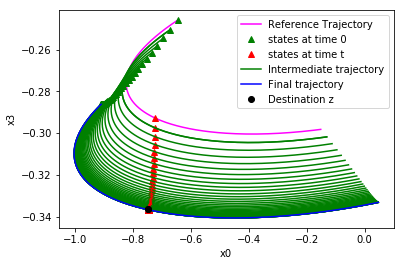

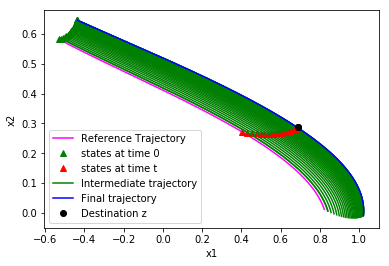

Time taken: 5.160563230514526
idx **** 5
50.4
0.0035823875535552275
0.007765246489323358
51


In [2]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9Tanh')
evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(201)

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 5
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    time_steps = random.sample(range(30, 200), 1)
    print(time_steps)
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.003, 
                        correction_steps = [1], scaling_factors=[0.1], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulationsCount()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

In [ ]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9')
evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(201)

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 5
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(r_states=[[0.53432163, -0.50705631, -0.10642957, 0.90469208]])[0]
    ref_traj = dataObject.generateTrajectories(r_states=[[0.9510333, -0.98411012, -0.29126114, 0.78761868]])[0]
#     time_steps = random.sample(range(30, 200), 1)
    print(time_steps)
    time_steps = [130]
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.005, 
                        correction_steps = [1], scaling_factors=[0.5], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulationsCount()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_OtherBenchC9Tanh.txt
[88]
[-0.8031989  -0.35136222  0.21514132 -0.34185378] [-0.77858913  0.39901871 -0.09664246 -0.36331666]
[-0.5653285  -0.40737782  0.61172352 -0.32746681] [-0.65649232  0.20972412  0.30980641 -0.35628204]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
88
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.46474750962777955
0.1
Final distance 0.004929302637255074
Final relative distance 0.01060641000788363
Min relative distance 0.01060641000788363
Min simulation: 45
Final simulation: 45


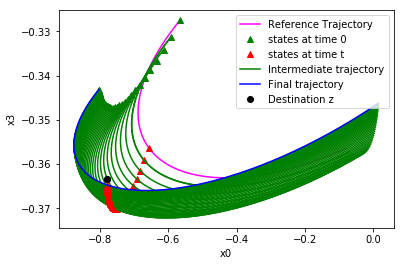

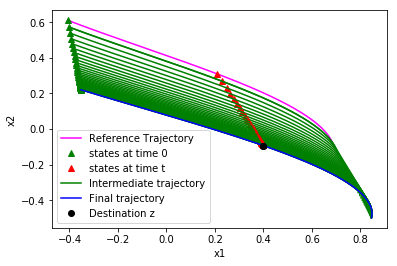

Time taken: 4.959020376205444
idx **** 1
[39]
[-0.56339043 -0.11340875  0.68748298 -0.4622644 ] [-0.55980149  0.13059794  0.50524734 -0.47159995]
[-0.56570834 -0.52088418  0.67762634 -0.3415283 ] [-0.71682624 -0.24495976  0.54128839 -0.35746831]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
39
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.4242939372622146
0.1
Final distance 0.004697031044712197
Final relative distance 0.011070228990355384
Min relative distance 0.011070228990355384
Min simulation: 47
Final simulation: 47


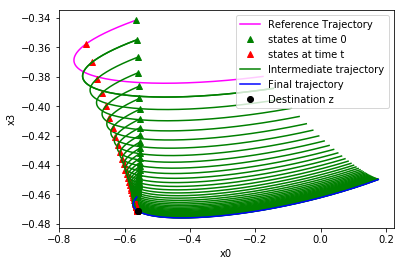

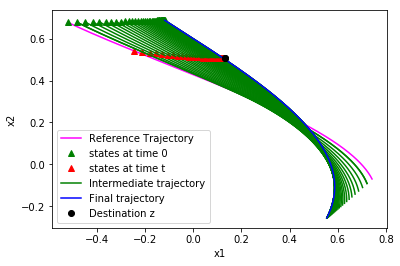

Time taken: 5.010700941085815
idx **** 2
[81]
[-0.90708983 -0.53973946  0.47406707 -0.06740275] [-1.00281421  0.31550204  0.39757265 -0.11974936]
[-0.57280843 -0.47061488  0.24741317 -0.4044896 ] [-0.73165591  0.09554866 -0.08653649 -0.41832576]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
81
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.6673948112631218
0.1
Final distance 0.007168759713148075
Final relative distance 0.010741407622843768
Min relative distance 0.010741407622843768
Min simulation: 51
Final simulation: 51


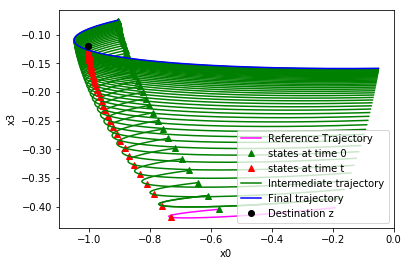

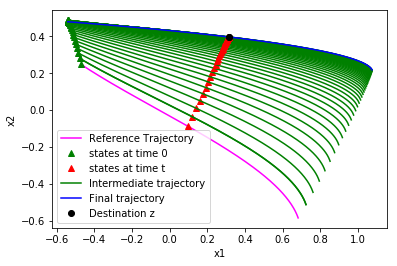

Time taken: 5.610421419143677
idx **** 3
[151]
[-0.64425796 -0.14939963  0.50562297 -0.34923166] [-0.15987627  0.65019761 -0.04453645 -0.36581119]
[-0.85057291 -0.15980729  0.31585168 -0.25232888] [-0.19529247  0.84542824 -0.09714127 -0.27942105]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
151
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.22271019471356268
0.1
Final distance 0.004631885009409108
Final relative distance 0.020797813119270887
Min relative distance 0.020797813119270887
Min simulation: 43
Final simulation: 43


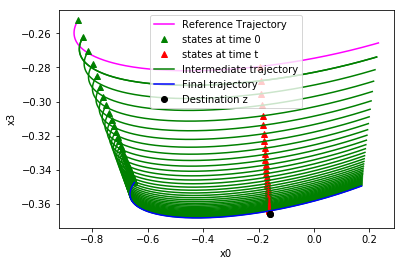

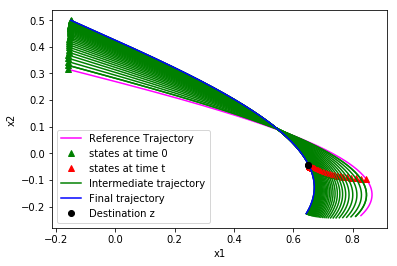

Time taken: 4.746751546859741
idx **** 4
[161]
[-0.86948351 -0.53423344  0.42468974 -0.3471478 ] [-0.47822189  0.89372363 -0.17866622 -0.38577751]
[-0.64994366 -0.33721331  0.48351819 -0.0267207 ] [-0.2658852   0.70370084  0.3752053  -0.09697466]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_OtherBenchC9Tanh_RBF_1_512_ReLU.h5
161
***** path idx 0 s_factor 0.1 correction steps 1
Starting distance: 0.6865684845563936
0.1
Final distance 0.008253625634285826
Final relative distance 0.012021562043615602
Min relative distance 0.012021562043615602
Min simulation: 51
Final simulation: 51


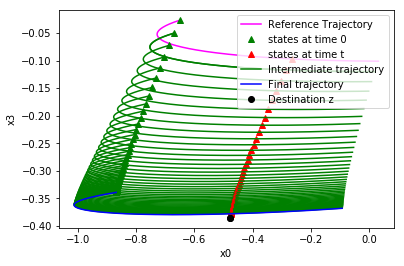

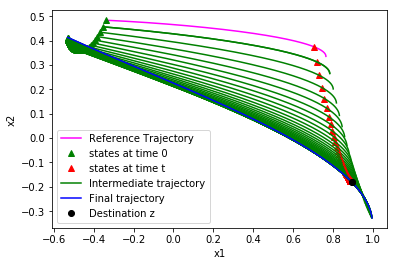

Time taken: 5.568547964096069
idx **** 5
47.4
0.0059361208077620565
0.013047484356793853
51


In [1]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='OtherBenchC9Tanh')
evalObject.setSimsBound(50)
dataObject = evalObject.setDataObject()
dataObject.setSteps(201)

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 5
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    time_steps = random.sample(range(30, 200), 1)
    print(time_steps)
#     time_steps = [177]
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.005, 
                        correction_steps = [1], scaling_factors=[0.1], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulationsCount()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))